In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Загрузка датасета

In [2]:
df = pd.read_excel('/content/gdrive/MyDrive/StudyData/winequality-white.xlsx')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Разделение данных на выборки

In [7]:
from sklearn.model_selection import train_test_split

dfX = df.drop(['quality'],axis=1)
dfY = df['quality']
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.3, stratify=dfY,
                                                    random_state=1)

GridSearch для подбора оптимальных гиперпараметров у каждого алгоритма

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

Модель линейного регрессора

In [9]:
from sklearn.linear_model import LinearRegression

LRModel = LinearRegression()
LRParameters = {}

gridLR = GridSearchCV(estimator=LRModel, param_grid = LRParameters, n_jobs = -1)
gridLR.fit(X_train, Y_train)
print('Best hyperparameters are: '+str(gridLR.best_params_))
bestLR = gridLR.best_estimator_
score = bestLR.score(X_test, Y_test)
print('R^2 score: '+str(score))
y_pred_linear_model = bestLR.predict(X_test)
print('MSE:',round(mean_squared_error(Y_test,y_pred_linear_model),3))
print('MAE:',round(mean_absolute_error(Y_test,y_pred_linear_model),3))

Best hyperparameters are: {}
R^2 score: 0.3168379122848085
MSE: 0.534
MAE: 0.573


Модель полиномиального регрессора

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

PRModel = Pipeline([('poly', PolynomialFeatures()),
                  ('linear', LinearRegression())])

PRParameters = {'poly__degree': [2, 3, 4, 5]}

gridPR = GridSearchCV(PRModel, param_grid=PRParameters, cv=5)
gridPR.fit(X_train, Y_train)
print('Best hyperparameters are: '+str(gridPR.best_params_))
bestPR = gridPR.best_estimator_
score = bestPR.score(X_test, Y_test)
print('R^2 score: '+str(score))
y_pred_linear_model = bestPR.predict(X_test)
print('MSE:',round(mean_squared_error(Y_test,y_pred_linear_model),3))
print('MAE:',round(mean_absolute_error(Y_test,y_pred_linear_model),3))

Best hyperparameters are: {'poly__degree': 2}
R^2 score: 0.37321066142253057
MSE: 0.49
MAE: 0.551


Модель регрессора на случайном лесе

In [11]:
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor()
RFParameters = {'n_estimators':[50,100,150],
                'max_depth':[3,5,10,None],
                'min_samples_split':[2,3,4],
                'min_samples_leaf':[1,2,3],
                'max_features':[1,3,5,7, "auto"]}

gridRF = GridSearchCV(estimator=RFModel, param_grid = RFParameters,
                      n_jobs = -1, error_score='raise')
gridRF.fit(X_train, Y_train)
print('Best hyperparameters are: '+str(gridRF.best_params_))
bestRF = gridRF.best_estimator_
score = bestRF.score(X_test, Y_test)
print('R^2 score: '+str(score))
y_pred_linear_model = bestRF.predict(X_test)
print('MSE:',round(mean_squared_error(Y_test,y_pred_linear_model),3))
print('MAE:',round(mean_absolute_error(Y_test,y_pred_linear_model),3))

Best hyperparameters are: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
R^2 score: 0.5446321084057011
MSE: 0.356
MAE: 0.429


Модель AdaBoost Regressor




In [15]:
from sklearn.ensemble import AdaBoostRegressor

baseModel = RandomForestRegressor(max_depth = None, max_features = 3,
                                  min_samples_leaf = 1, min_samples_split = 2,
                                  n_estimators = 150)

boostedModel = AdaBoostRegressor(estimator=baseModel)
ADAParameters = {'n_estimators':[150],
                'learning_rate':[0.1,1]}

gridADA = GridSearchCV(estimator=boostedModel, param_grid = ADAParameters,
                      n_jobs = -1, error_score='raise')
gridADA.fit(X_train, Y_train)
print('Best hyperparameters are: '+str(gridADA.best_params_))
bestADABooster = gridADA.best_estimator_

score = bestADABooster.score(X_test, Y_test)
print('Best score is: '+str(score))
y_pred_linear_model = bestADABooster.predict(X_test)
print('MSE:',round(mean_squared_error(Y_test,y_pred_linear_model),3))
print('MAE:',round(mean_absolute_error(Y_test,y_pred_linear_model),3))

Best hyperparameters are: {'learning_rate': 0.1, 'n_estimators': 150}
Best score is: 0.5575876600175103
MSE: 0.346
MAE: 0.433


Сохранение лучшей модели

In [13]:
import pickle 
pickle.dump(bestADABooster, open('/content/gdrive/MyDrive/StudyData/wine_regression.pkl', 'wb'))

<Axes: >

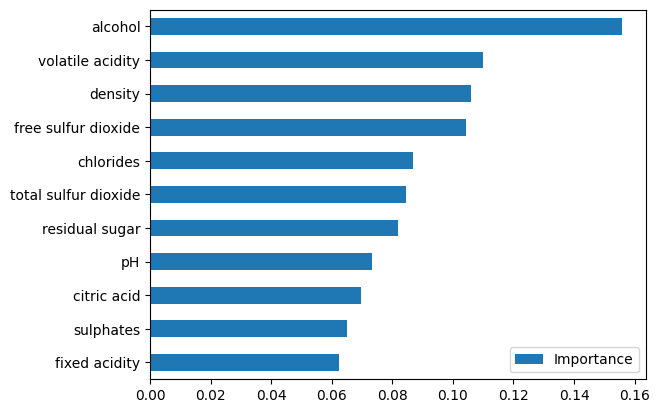

In [14]:
tree_feature_importances=pd.DataFrame(bestRF.feature_importances_,
                                      index=columns,
                                      columns=['Importance']).sort_values('Importance',
                                                                          ascending=True)
tree_feature_importances.plot.barh()     